# Exploring the data

Using TPOT to get good initial hyperparameters and model selection.

In [12]:
# Import libraries
import pandas as pd
import numpy as np

In [15]:
# Load the data and cleanup

# Read data
train_data_df = pd.read_csv("data/train_data.csv", header=None)
test_data_df = pd.read_csv("data/test_data.csv", header=None)
train_labels_df = pd.read_csv("data/train_labels.csv", header=None)

print(train_data_df.shape)
print(test_data_df.shape)
train_data_df.head()

(4363, 264)
(6544, 264)


,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,...,0.216490,0.36548,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463
1,2309.4,4780.4,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.0,3374.7,...,0.100670,0.14739,0.102560,0.213040,0.082041,0.080967,0.076450,0.052523,0.052357,0.055297
2,2331.9,4607.0,4732.3,5007.0,3164.9,3171.9,2915.7,3282.3,2400.0,1895.2,...,0.126760,0.36321,0.114200,0.223780,0.100770,0.186910,0.067270,0.061138,0.085509,0.049422
3,3350.9,6274.4,5037.0,4609.7,3438.8,3925.8,3746.4,3539.4,3053.7,3075.4,...,0.096479,0.28950,0.074124,0.201580,0.049032,0.130210,0.045800,0.080885,0.148910,0.042027
4,2017.6,3351.8,2924.9,2726.3,1979.9,1930.9,2083.4,1889.2,1695.4,1911.7,...,0.138340,0.38266,0.079402,0.063495,0.053717,0.086750,0.062090,0.048999,0.033159,0.070813


In [4]:
train_data_df = train_data_df.drop([216, 217, 218, 219], axis=1)
test_data_df = test_data_df.drop([216, 217, 218, 219], axis=1)

In [5]:
from sklearn import preprocessing

# min_max_scaler = preprocessing.StandardScaler()
# min_max_scaler = preprocessing.RobustScaler()
min_max_scaler = preprocessing.MinMaxScaler()

train_data = min_max_scaler.fit_transform(train_data_df)

In [6]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels_df.as_matrix().ravel(),
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=5, population_size=10, verbosity=2, scoring='neg_log_loss')
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline_neglogloss_minmaxscaled_droppedfeatures.py')

HBox(children=(IntProgress(value=0, description='Optimization Progress', max=60), HTML(value='')))



TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.4, min_samples_leaf=4, min_samples_split=12, n_estimators=100)
-1.27484218014


True

In [9]:
pd.DataFrame.from_dict(tpot.evaluated_individuals_)

,"BernoulliNB(Binarizer(PCA(input_matrix, PCA__iterated_power=9, PCA__svd_solver=randomized), Binarizer__threshold=1.0), BernoulliNB__alpha=0.01, BernoulliNB__fit_prior=False)","BernoulliNB(Binarizer(input_matrix, Binarizer__threshold=1.0), BernoulliNB__alpha=0.01, BernoulliNB__fit_prior=False)","BernoulliNB(CombineDFs(input_matrix, input_matrix), BernoulliNB__alpha=0.1, BernoulliNB__fit_prior=True)","BernoulliNB(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=3, DecisionTreeClassifier__min_samples_leaf=9, DecisionTreeClassifier__min_samples_split=14), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=True)","BernoulliNB(FastICA(input_matrix, FastICA__tol=0.55), BernoulliNB__alpha=0.01, BernoulliNB__fit_prior=False)","BernoulliNB(GaussianNB(input_matrix), BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)","BernoulliNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=6, GradientBoostingClassifier__max_features=0.55, GradientBoostingClassifier__min_samples_leaf=19, GradientBoostingClassifier__min_samples_split=11, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.1), BernoulliNB__alpha=0.001, BernoulliNB__fit_prior=False)","BernoulliNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=6, GradientBoostingClassifier__max_features=0.55, GradientBoostingClassifier__min_samples_leaf=4, GradientBoostingClassifier__min_samples_split=11, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.1), BernoulliNB__alpha=0.001, BernoulliNB__fit_prior=False)","BernoulliNB(StandardScaler(input_matrix), BernoulliNB__alpha=0.001, BernoulliNB__fit_prior=False)","BernoulliNB(ZeroCount(input_matrix), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=True)",...,"XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.001, XGBClassifier__max_depth=5, XGBClassifier__min_child_weight=9, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.7)","XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.01, XGBClassifier__max_depth=2, XGBClassifier__min_child_weight=3, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.55)","XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.01, XGBClassifier__max_depth=3, XGBClassifier__min_child_weight=17, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.85)","XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.01, XGBClassifier__max_depth=3, XGBClassifier__min_child_weight=7, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.65)","XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.01, XGBClassifier__max_depth=5, XGBClassifier__min_child_weight=18, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.75)","XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.01, XGBClassifier__max_depth=7, XGBClassifier__min_child_weight=7, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.65)","XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.1, XGBClassifier__max_depth=5, XGBClassifier__min_child_weight=7, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.7)","XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.1, XGBClassifier__max_depth=9, XGBClassifier__min_child_weight=3, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.15)","XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.5, XGBClassifier__max_depth=9, XGBClassifier__min_child_weight=14, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.05)","XGBClassifier(input_matrix, XGBClassifier__learning_rate=1.0, XGBClassifier__max_depth=

In [10]:
print(tpot.score(X_test, y_test))


-1.10225800614


In [17]:
pd.DataFrame.from_dict(tpot.evaluated_individuals_)

,"BernoulliNB(ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.8, ExtraTreesClassifier__min_samples_leaf=2, ExtraTreesClassifier__min_samples_split=4, ExtraTreesClassifier__n_estimators=100), BernoulliNB__alpha=0.01, BernoulliNB__fit_prior=True)","BernoulliNB(LinearSVC(input_matrix, LinearSVC__C=15.0, LinearSVC__dual=False, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l1, LinearSVC__tol=0.0001), BernoulliNB__alpha=0.1, BernoulliNB__fit_prior=True)","BernoulliNB(SelectFromModel(input_matrix, SelectFromModel__ExtraTreesClassifier__criterion=entropy, SelectFromModel__ExtraTreesClassifier__max_features=0.35, SelectFromModel__ExtraTreesClassifier__n_estimators=100, SelectFromModel__threshold=0.05), BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)","BernoulliNB(input_matrix, BernoulliNB__alpha=0.001, BernoulliNB__fit_prior=False)","BernoulliNB(input_matrix, BernoulliNB__alpha=0.1, BernoulliNB__fit_prior=True)","BernoulliNB(input_matrix, BernoulliNB__alpha=10.0, BernoulliNB__fit_prior=False)","DecisionTreeClassifier(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=0.3, GradientBoostingClassifier__min_samples_leaf=16, GradientBoostingClassifier__min_samples_split=17, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.65), DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=5, DecisionTreeClassifier__min_samples_leaf=2, DecisionTreeClassifier__min_samples_split=14)","DecisionTreeClassifier(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=0.3, GradientBoostingClassifier__min_samples_leaf=16, GradientBoostingClassifier__min_samples_split=6, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.65), DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=5, DecisionTreeClassifier__min_samples_leaf=2, DecisionTreeClassifier__min_samples_split=14)","DecisionTreeClassifier(SelectPercentile(input_matrix, SelectPercentile__percentile=29), DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=5, DecisionTreeClassifier__min_samples_leaf=5, DecisionTreeClassifier__min_samples_split=18)","DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=2, DecisionTreeClassifier__min_samples_leaf=7, DecisionTreeClassifier__min_samples_split=11)",...,"RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.3, RandomForestClassifier__min_samples_leaf=20, RandomForestClassifier__min_samples_split=17, RandomForestClassifier__n_estimators=100)","RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.3, RandomForestClassifier__min_samples_leaf=20, RandomForestClassifier__min_samples_split=11, RandomForestClassifier__n_estimators=100)","RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.3, RandomForestClassifier__min_samples_leaf=20, RandomForestClassifier__min_samples_split=13, RandomForestClassifier__n_estimators=100)","RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.3, RandomForestClassifier__min_samples_leaf=20, RandomForestClassifier__min_samples_split=17, RandomForestClassifier__n_estimators=100)","RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, Ran

In [83]:
pd.DataFrame.from_dict(tpot.evaluated_individuals_)

,"BernoulliNB(OneHotEncoder(input_matrix, OneHotEncoder__minimum_fraction=0.1, OneHotEncoder__sparse=False, OneHotEncoder__threshold=10), BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=False)","BernoulliNB(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), BernoulliNB__alpha=1.0, BernoulliNB__fit_prior=True)","BernoulliNB(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), BernoulliNB__alpha=100.0, BernoulliNB__fit_prior=True)","BernoulliNB(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.001), BernoulliNB__alpha=0.01, BernoulliNB__fit_prior=True)","BernoulliNB(input_matrix, BernoulliNB__alpha=0.01, BernoulliNB__fit_prior=True)","DecisionTreeClassifier(LinearSVC(input_matrix, LinearSVC__C=25.0, LinearSVC__dual=True, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l2, LinearSVC__tol=1e-05), DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=4, DecisionTreeClassifier__min_samples_leaf=14, DecisionTreeClassifier__min_samples_split=18)","DecisionTreeClassifier(LinearSVC(input_matrix, LinearSVC__C=25.0, LinearSVC__dual=True, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l2, LinearSVC__tol=1e-05), DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=8, DecisionTreeClassifier__min_samples_leaf=14, DecisionTreeClassifier__min_samples_split=18)","DecisionTreeClassifier(MaxAbsScaler(input_matrix), DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=10, DecisionTreeClassifier__min_samples_leaf=6, DecisionTreeClassifier__min_samples_split=2)","DecisionTreeClassifier(Nystroem(input_matrix, Nystroem__gamma=0.0, Nystroem__kernel=laplacian, Nystroem__n_components=5), DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=3, DecisionTreeClassifier__min_samples_leaf=11, DecisionTreeClassifier__min_samples_split=7)","DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=8, DecisionTreeClassifier__min_samples_leaf=3, DecisionTreeClassifier__min_samples_split=5)",...,"GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=10, GradientBoostingClassifier__max_features=0.45, GradientBoostingClassifier__min_samples_leaf=18, GradientBoostingClassifier__min_samples_split=16, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.95)","GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=8, GradientBoostingClassifier__max_features=0.45, GradientBoostingClassifier__min_samples_leaf=12, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.35)","LinearSVC(BernoulliNB(input_matrix, BernoulliNB__alpha=0.001, BernoulliNB__fit_prior=True), LinearSVC__C=15.0, LinearSVC__dual=False, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l1, LinearSVC__tol=1e-05)","LinearSVC(BernoulliNB(input_matrix, BernoulliNB__alpha=0.01, BernoulliNB__fit_prior=True), LinearSVC__C=15.0, LinearSVC__dual=False, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l1, LinearSVC__tol=1e-05)","LinearSVC(ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=True, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=13, ExtraTreesClassifier__min_samples_split=4, ExtraTreesClassifier__n_estimators=100), LinearSVC__C=10.0, LinearSVC__dual=False, LinearSVC__loss=squared_hinge, LinearSVC__penalty=l2, LinearSVC__tol=0.01)","LinearSVC(ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=True, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__mi

In [7]:
test_data = min_max_scaler.fit_transform(test_data_df)

# Appendix

## K-nearest neighbors

### 5 neighbors
Scale is the best, but still like 8.3 and 55%

```
In [21]: %run classifiers.py --model "KNN"
Cross validation logloss scores: -9.39785[0.22458]*
Cross validation accuracy scores: 0.52094[0.00636]*
Weighted AUC: 0.73311, Macro AUC: 0.66589

In [2]: %run classifiers.py --model "KNN" --scale
Cross validation logloss scores: -8.27549[0.53086]*
Cross validation accuracy scores: 0.55144[0.00917]*
Weighted and Macro AUC: 0.74460/0.68025

In [22]: %run classifiers.py --model "KNN" --scale --drop
Cross validation logloss scores: -8.27547[0.55342]*
Cross validation accuracy scores: 0.55012[0.00737]*
Weighted AUC: 0.74815, Macro AUC: 0.68535
```

### Increasing neighbors
Increasing neighbors helps a lot with log-loss but not as much with accuracy, and still is a lot worse than the others:

```
In [6]: %run classifiers.py --model "KNN" --scale --neighbors 10
Cross validation logloss scores: -5.23405[0.42317]*
Cross validation accuracy scores: 0.55537[0.01048]*
Validation log-loss and accuracy: 5.10507 0.59358
Weighted and Macro AUC: 0.78510/0.73661

In [7]: %run classifiers.py --model "KNN" --scale --neighbors 20
Cross validation logloss scores: -2.99511[0.29235]*
Cross validation accuracy scores: 0.57171[0.00262]*
Validation log-loss and accuracy: 2.98684 0.60122
Weighted and Macro AUC: 0.80894/0.77096

In [8]: %run classifiers.py --model "KNN" --scale --neighbors 50
Cross validation logloss scores: -1.78031[0.08868]*
Cross validation accuracy scores: 0.56352[0.00389]*
Validation log-loss and accuracy: 1.76163 0.59969
Weighted and Macro AUC: 0.82420/0.79622

In [9]: %run classifiers.py --model "KNN" --scale --neighbors 100
Cross validation logloss scores: -1.46001[0.05067]*
Cross validation accuracy scores: 0.55436[0.00515]*
Validation log-loss and accuracy: 1.45765 0.58976
Weighted and Macro AUC: 0.82806/0.80784

In [10]: %run classifiers.py --model "KNN" --scale --neighbors 200
Cross validation logloss scores: -1.39694[0.02008]*
Cross validation accuracy scores: 0.53209[0.00049]*
Validation log-loss and accuracy: 1.33412 0.58060
Weighted and Macro AUC: 0.82732/0.80952
```


## Correlation matrix

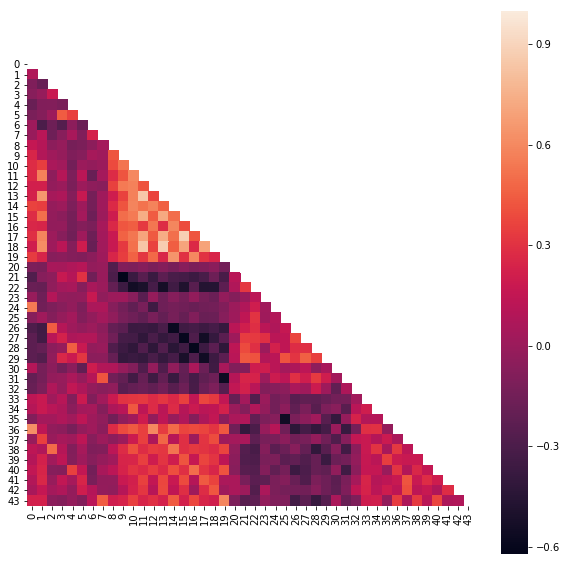

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
mfcc_corr = np.corrcoef(train_data_df.iloc[:, 216:263].T)  # mfcc
mask = np.zeros_like(mfcc_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(mfcc_corr, mask=mask, square=True)
plt.show()

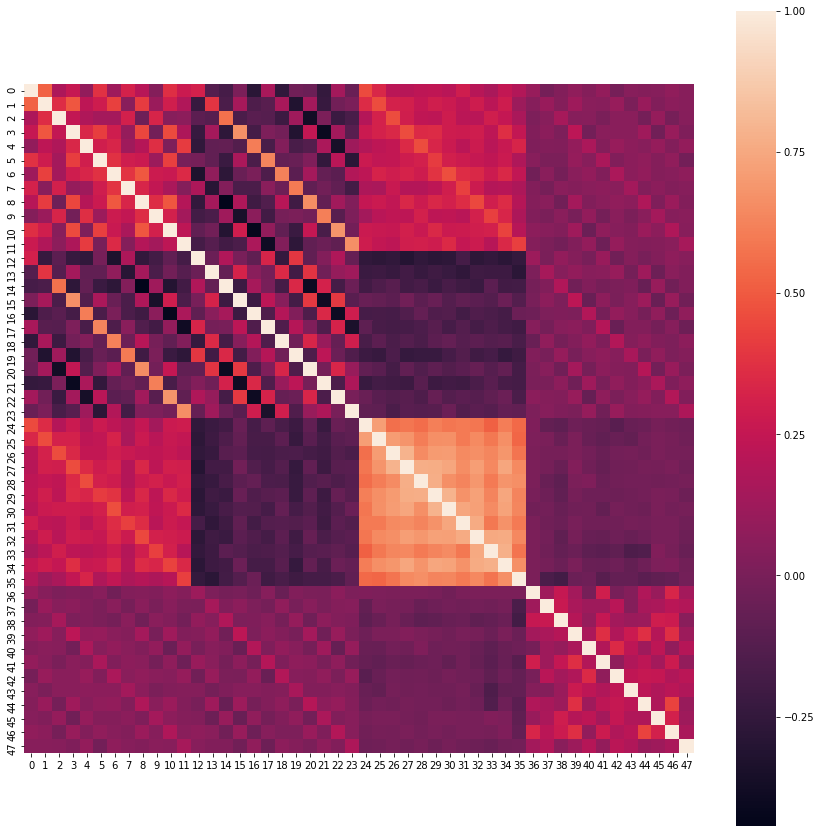

In [10]:
chroma_corr = np.corrcoef(train_data_df.iloc[:, 168:216].T)  # chroma
plt.figure(figsize=(15, 15))
sns.heatmap(chroma_corr, square=True)
plt.show()